In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
import time
from datetime import datetime
from config import weather_api_key

In [2]:
# In the next cell, we'll add the code that generates the latitudes and longitudes, but first, they need to be 
# stored so that we can access them later. Since we are creating arrays of latitudes and longitudes, 
# we'll declare each array as a variable.

# In the next cell, add the following code that we used to generate the random latitudes. 
# Also, we'll create a similar code snippet that will generate longitudes. 
# To ensure enough latitudes and longitudes, we'll start with 1,500. In addition, we'll pack the 
# latitudes (lats) and longitudes (lngs) as pairs by zipping them (lat_lngs) with the zip() function.

# Create a set of random latitude and longitude combinations.

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# The zip object packs each pair of lats and lngs having the same index in their respective array into a tuple. 
# If there are 1,500 latitudes and longitudes, there will be 1,500 tuples of paired latitudes and longitudes, 
# where each latitude and longitude in a tuple can be accessed by the index of 0 and 1, respectively.

In [4]:
# Create a list for holding the cities.

cities = []
coordinates = list(lat_lngs)

# Identify the nearest city for each latitude and longitude combination.

for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

# If the city is unique, then we will add it to the cities list.
    
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.

len(cities)

601

In [5]:
# Starting URL for Weather Map API Call.

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | siocon
Processing Record 2 of Set 1 | kapaa
Processing Record 3 of Set 1 | port alfred
Processing Record 4 of Set 1 | kurilsk
Processing Record 5 of Set 1 | east london
Processing Record 6 of Set 1 | punta arenas
Processing Record 7 of Set 1 | rundu
Processing Record 8 of Set 1 | kazalinsk
City not found. Skipping...
Processing Record 9 of Set 1 | oga
Processing Record 10 of Set 1 | zheleznodorozhnyy
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | thompson
Processing Record 13 of Set 1 | cienfuegos
Processing Record 14 of Set 1 | gimli
Processing Record 15 of Set 1 | ixtapa
Processing Record 16 of Set 1 | albany
Processing Record 17 of Set 1 | lufilufi
Processing Record 18 of Set 1 | sao filipe
Processing Record 19 of Set 1 | sao gabriel da cachoeira
Processing Record 20 of Set 1 | hithadhoo
Processing Record 21 of Set 1 | cap malheureux
Processing Record 22 of Set 1 | rev

Processing Record 37 of Set 4 | bereda
Processing Record 38 of Set 4 | imbituba
Processing Record 39 of Set 4 | portland
Processing Record 40 of Set 4 | naliya
Processing Record 41 of Set 4 | cherskiy
Processing Record 42 of Set 4 | bandarbeyla
Processing Record 43 of Set 4 | bonthe
Processing Record 44 of Set 4 | lopatino
Processing Record 45 of Set 4 | phuket
Processing Record 46 of Set 4 | novyy urengoy
Processing Record 47 of Set 4 | dubbo
Processing Record 48 of Set 4 | norrtalje
Processing Record 49 of Set 4 | tarata
Processing Record 50 of Set 4 | long beach
Processing Record 1 of Set 5 | tuktoyaktuk
Processing Record 2 of Set 5 | polovinnoye
Processing Record 3 of Set 5 | jamestown
Processing Record 4 of Set 5 | kattivakkam
Processing Record 5 of Set 5 | ust-kamchatsk
City not found. Skipping...
Processing Record 6 of Set 5 | abdanan
Processing Record 7 of Set 5 | sao felix do xingu
Processing Record 8 of Set 5 | soe
Processing Record 9 of Set 5 | peace river
Processing Record 

Processing Record 29 of Set 8 | katastarion
Processing Record 30 of Set 8 | bokspits
City not found. Skipping...
Processing Record 31 of Set 8 | damara
Processing Record 32 of Set 8 | entrerrios
Processing Record 33 of Set 8 | impfondo
Processing Record 34 of Set 8 | aykhal
Processing Record 35 of Set 8 | brae
Processing Record 36 of Set 8 | chicama
Processing Record 37 of Set 8 | parakai
Processing Record 38 of Set 8 | kalianget
Processing Record 39 of Set 8 | sonoita
Processing Record 40 of Set 8 | trinidad
Processing Record 41 of Set 8 | kohlu
Processing Record 42 of Set 8 | santiago de chuco
Processing Record 43 of Set 8 | hinton
Processing Record 44 of Set 8 | klaksvik
Processing Record 45 of Set 8 | hutchinson
Processing Record 46 of Set 8 | coari
Processing Record 47 of Set 8 | bouca
Processing Record 48 of Set 8 | sisimiut
Processing Record 49 of Set 8 | pierre
Processing Record 50 of Set 8 | saint-augustin
Processing Record 1 of Set 9 | kailua
Processing Record 2 of Set 9 | ai

Processing Record 16 of Set 12 | ilulissat
Processing Record 17 of Set 12 | roald
Processing Record 18 of Set 12 | deputatskiy
Processing Record 19 of Set 12 | ahuimanu
Processing Record 20 of Set 12 | ugoofaaru
Processing Record 21 of Set 12 | vila velha
Processing Record 22 of Set 12 | takoradi
Processing Record 23 of Set 12 | alto araguaia
Processing Record 24 of Set 12 | anadyr
Processing Record 25 of Set 12 | rawson
Processing Record 26 of Set 12 | linqu
Processing Record 27 of Set 12 | kroya
Processing Record 28 of Set 12 | morgan city
Processing Record 29 of Set 12 | peraiyur
Processing Record 30 of Set 12 | cayenne
Processing Record 31 of Set 12 | tawkar
City not found. Skipping...
Processing Record 32 of Set 12 | luderitz
Processing Record 33 of Set 12 | lompoc
Processing Record 34 of Set 12 | batagay
Processing Record 35 of Set 12 | kungurtug
Processing Record 36 of Set 12 | bowen
Processing Record 37 of Set 12 | takaka
Processing Record 38 of Set 12 | a
City not found. Skipp

In [7]:
# Convert the array of dictionaries to a Pandas DataFrame.

city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Siocon,7.7061,122.1353,77.58,92,100,10.94,PH,2022-09-15 22:04:18
1,Kapaa,22.0752,-159.3190,84.52,64,0,8.05,US,2022-09-15 22:04:19
2,Port Alfred,-33.5906,26.8910,63.12,78,57,4.99,ZA,2022-09-15 22:04:19
3,Kurilsk,45.2333,147.8833,56.32,72,100,3.09,RU,2022-09-15 22:04:19
4,East London,-33.0153,27.9116,66.09,63,98,4.94,ZA,2022-09-15 22:00:16
5,Punta Arenas,-53.1500,-70.9167,41.11,60,100,12.66,CL,2022-09-15 22:02:54
6,Rundu,-17.9333,19.7667,63.61,26,0,6.78,NA,2022-09-15 22:04:20
7,Oga,46.4631,10.3470,53.69,94,49,5.93,IT,2022-09-15 22:04:21
8,Zheleznodorozhnyy,55.7503,38.0042,48.61,92,9,5.21,RU,2022-09-15 22:04:22
9,Rikitea,-23.1203,-134.9692,71.53,74,10,10.83,PF,2022-09-15 22:04:22


In [8]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

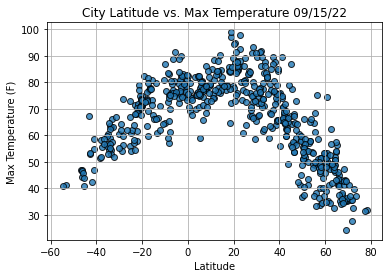

In [9]:
# Import time module
# import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.jpeg")

# Show plot.
plt.show()


In [10]:
# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()


<Figure size 432x288 with 0 Axes>

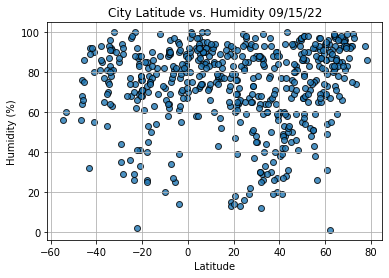

In [11]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.jpeg")
# Show plot.
plt.show()

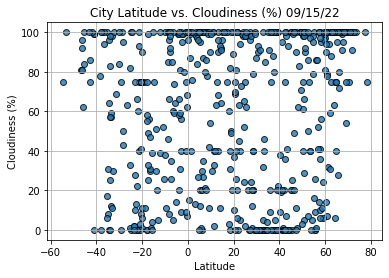

In [12]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.jpeg")
# Show plot.
plt.show()

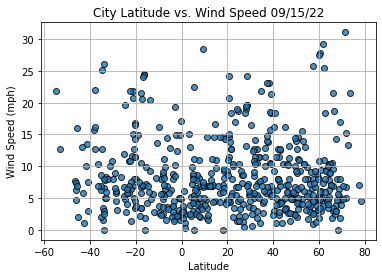

In [13]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.jpeg")
# Show plot.
plt.show()

In [14]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.

# def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [15]:
index13 = city_data_df.loc[13]
index13

City                       Ixtapa
Lat                          20.7
Lng                        -105.2
Max Temp                    85.23
Humidity                       79
Cloudiness                     75
Wind Speed                   11.5
Country                        MX
Date          2022-09-15 22:04:24
Name: 13, dtype: object

In [16]:
city_data_df['Lat'] >= 0

0       True
1       True
2      False
3       True
4      False
       ...  
544     True
545     True
546     True
547    False
548     True
Name: Lat, Length: 549, dtype: bool

In [17]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Siocon,7.7061,122.1353,77.58,92,100,10.94,PH,2022-09-15 22:04:18
1,Kapaa,22.0752,-159.3190,84.52,64,0,8.05,US,2022-09-15 22:04:19
3,Kurilsk,45.2333,147.8833,56.32,72,100,3.09,RU,2022-09-15 22:04:19
7,Oga,46.4631,10.3470,53.69,94,49,5.93,IT,2022-09-15 22:04:21
8,Zheleznodorozhnyy,55.7503,38.0042,48.61,92,9,5.21,RU,2022-09-15 22:04:22
...,...,...,...,...,...,...,...,...,...
543,Vanavara,60.3400,102.2797,34.84,95,14,3.38,RU,2022-09-15 22:19:05
544,Batticaloa,7.7102,81.6924,78.66,82,86,2.13,LK,2022-09-15 22:15:26
545,Pochutla,15.7432,-96.4661,78.62,77,100,6.87,MX,2022-09-15 22:19:06
546,Birao,10.2849,22.7882,72.86,94,99,3.87,CF,2022-09-15 22:19:06


In [19]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()



,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Siocon,7.7061,122.1353,77.58,92,100,10.94,PH,2022-09-15 22:04:18
1,Kapaa,22.0752,-159.3190,84.52,64,0,8.05,US,2022-09-15 22:04:19
3,Kurilsk,45.2333,147.8833,56.32,72,100,3.09,RU,2022-09-15 22:04:19
7,Oga,46.4631,10.3470,53.69,94,49,5.93,IT,2022-09-15 22:04:21
8,Zheleznodorozhnyy,55.7503,38.0042,48.61,92,9,5.21,RU,2022-09-15 22:04:22


In [20]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

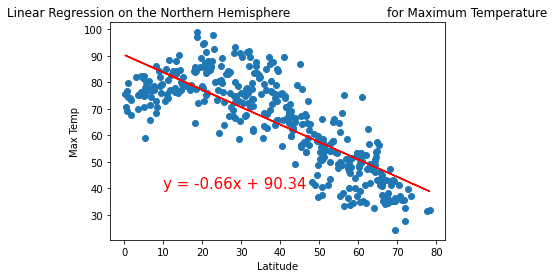

In [21]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

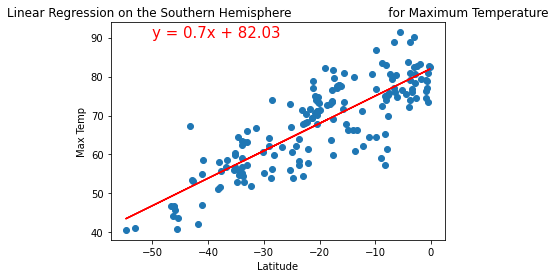

In [23]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

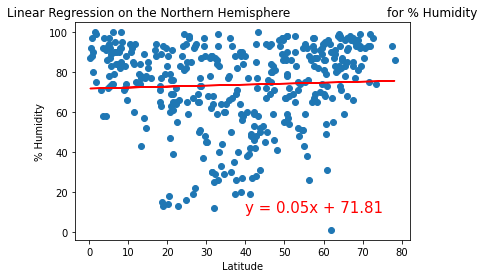

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

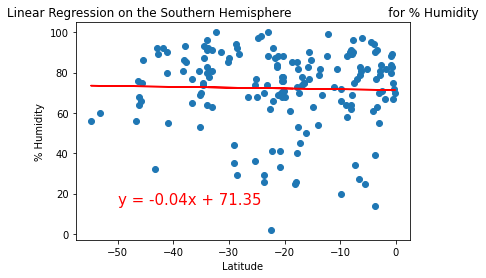

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

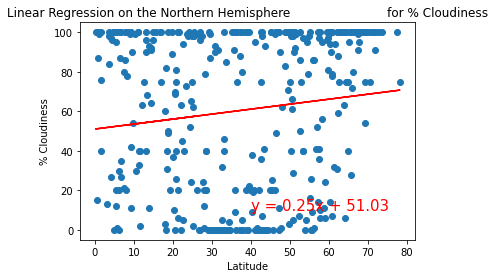

In [39]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

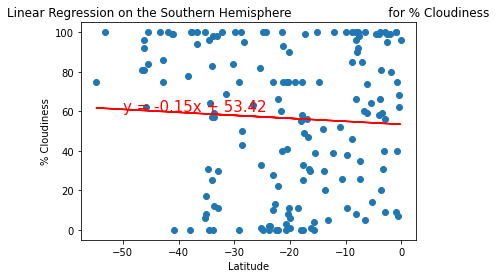

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

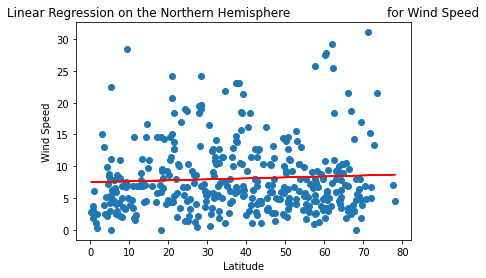

In [41]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

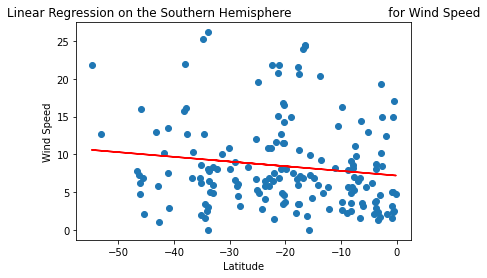

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))